In [2]:
#!pip install diffusers

In [3]:
import torch

from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
# Check for CUDA availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load Stable Diffusion models
sd_model = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", 
    torch_dtype=torch.float16
).to(device)

Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [17]:
proposicao_1_pt_br = "Dispõe sobre a inclusão no currículo escolar de matéria destinada a orientar sobre os problemas decorrentes do consumo de drogas."

In [22]:
def generate_image(prompt, negative_prompt, guidance_scale, seed=1024):
    return sd_model(
        prompt,
        negative_prompt=negative_prompt,
        guidance_scale=guidance_scale,
        num_inference_steps=50,
        generator=torch.Generator("cuda")#.manual_seed(seed),
    ).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

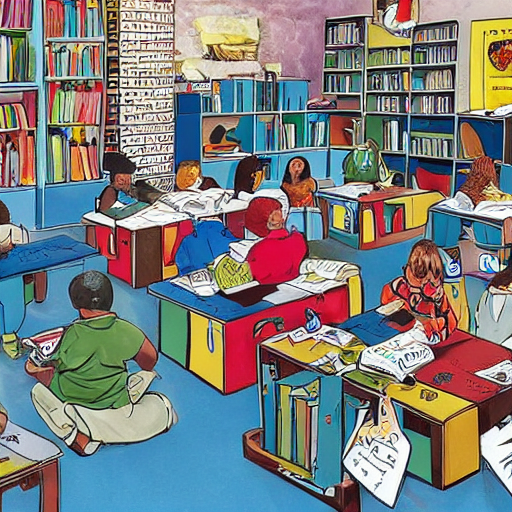

In [14]:
# Proposição 1
generate_image(
    prompt="an illustration of school curriculum a subject aimed at guiding about the problems arising from drug consumption",
    negative_prompt="low resolution, bad anatomy",
    guidance_scale=5.0
)

  0%|          | 0/50 [00:00<?, ?it/s]

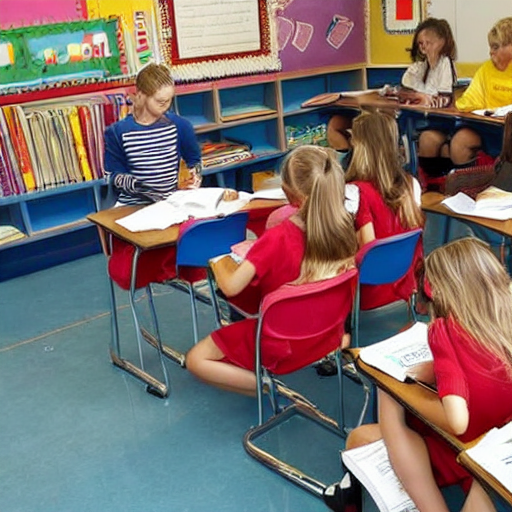

In [15]:
generate_image(
    prompt="a realistic photo of school curriculum a subject aimed at guiding about the problems arising from drug consumption",
    negative_prompt="grainy, overexposed",
    guidance_scale=6.0
)

  0%|          | 0/50 [00:00<?, ?it/s]

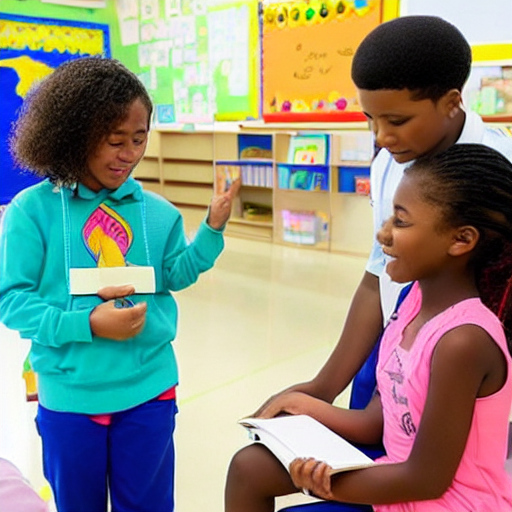

In [24]:
generate_image(
    prompt="children learning about school curriculum a subject aimed at guiding about the problems arising from drug consumption in a classroom",
    negative_prompt="dark, cluttered",
    guidance_scale=9.0
)

In [19]:
proposicao_2_pt_br = "Altera a Lei nº 9.998, de 17 de agosto de 2000, que institui o Fundo de Universalização dos Serviços de Telecomunicações para determinar a aplicação de recursos em educação e em ciência e tecnologia."

  0%|          | 0/50 [00:00<?, ?it/s]

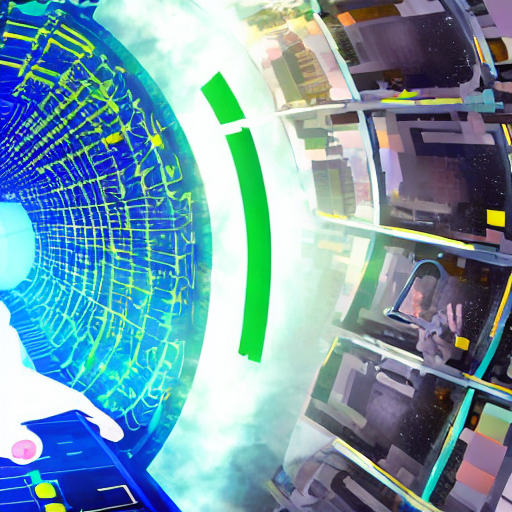

In [26]:
generate_image(
    prompt="a futuristic depiction of the Fund for Universalization of Telecommunications Services to allocate resources to education and science and technology",
    negative_prompt="dull, outdated",
    guidance_scale=5.5
)


  0%|          | 0/50 [00:00<?, ?it/s]

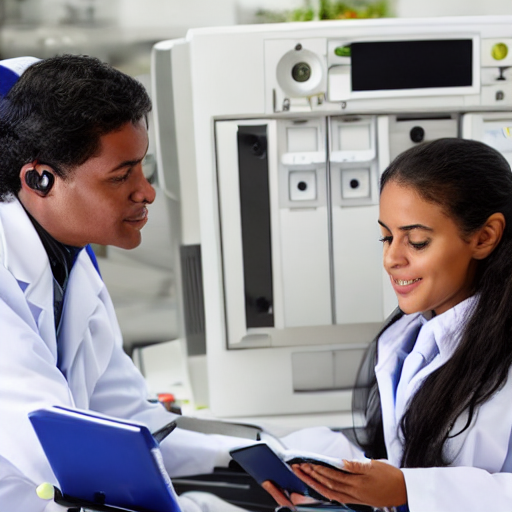

In [29]:
generate_image(
    prompt="a technological representation of the Fund for the Universalization of Telecommunications Services to allocate resources to education and science and technology",
    negative_prompt="blurry, pixelated",
    guidance_scale=8.5
)

  0%|          | 0/50 [00:00<?, ?it/s]

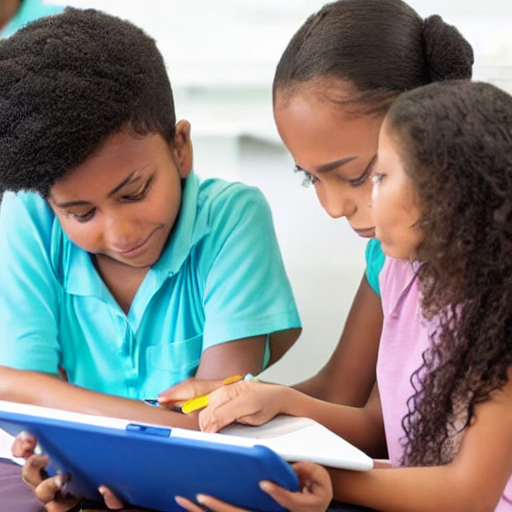

In [30]:
generate_image(
    prompt="students using technology in education with the Fund for the Universalization of Telecommunications Services with resources to education and science and technology",
    negative_prompt="messy, poorly lit",
    guidance_scale=7.0
)

### Conclusão:

Ambas as proposições tinham a ver com Educação, a primeira mais voltada para conscientização contra o uso de drogas, e a segunda mais voltada para o uso de um fundo criado para educação ciência e tecnologia

Aparentemente o modelo utlizado tem dificuldades em representar pessoas, o que era necessário para a maioria dos casos, como a qualidade das pessoas geradas não foi satisfatório, o resultado final não foi bom

O modelo conseguiu alterar o estilo, no caso da primeira proposição foi feito um estilo mais ilustrativo e um realista, e na segunda proposição foi feito um estilo mais futurista e tecnológico

Minha ideia foi não fugir muito do texto das ementas das proposições, para testar a capacidade do modelo de absorver ideias, acredito que isso não tenha funcionado bem, pois as imagens geradas foram muito genéricas e não representavam bem as proposições.

Possivelmente se ao invés de focar na proposição em si, o foco fosse apenas no tema geral da proposição como "Tecnologia e Educação", o resultado teria sido melhor.